# Content
01.09.2025
## 1. Sales
1.1 [EDA](https://colab.research.google.com/drive/1io5VNWHmiDmn_rg9bKa1j0H6LqDNS4NR)  
1.2 [SPC](https://colab.research.google.com/drive/1PbqfbITrbjdQzJAGWF3PSCasTG7g7Wzy#scrollTo=3ON5yj9YfXxk)  
1.3 [FC](https://colab.research.google.com/drive/1hu78fzV_VS4bXGMnkidhgh9fPP1kFGWl#scrollTo=PeJZJm4YYtJ5)  
1.4 [Feature Engineering and RFM](https://colab.research.google.com/drive/1h28pnMQc8uKE8WTVBPwbWj7R1Tv3dx34)  
1.5 [Dashboard](https://colab.research.google.com/drive/1p8vbCfD991t8-4srvKDEm7souyviOzcQ#scrollTo=RCYNS8i8h4sa)  
1.6 [Market Basket](https://colab.research.google.com/drive/1iTeN6MO9LOQSy5rBdypyqJXe3nZX8DxR)  
1.7 [Collaborative Filtering](https://colab.research.google.com/drive/1JoeBe9Lz-47EhuuJ8FRRArUSxjOH0-Xd)  
1.8 [Hybrid Recommender](https://colab.research.google.com/drive/1urcbHXMQKsSpFjGUk8pj5AHgC076zM4d)  
1.9 Churn Prediction

# Empfehlungssysteme mit TensorFlow Recommenders (TFRS): Hybride Modelle aus Content- und Collaborative Filtering


Unser Modell kombiniert, ähnlich wie LightFM, die Stärken von zwei fundamentalen Ansätzen, um präzise und robuste Filmempfehlungen zu geben. Schauen wir uns die beiden Grundprinzipien an, die in unserem Modell zusammenfließen.

#### 1. Collaborative Filtering – Empfehlungen aus Interaktionsmustern

**Idee: „Nutzer, die ähnliche Filme wie du bewertet haben, mögen wahrscheinlich auch andere Filme, die du noch nicht kennst.“**

Das Modell lernt aus dem kollektiven Verhalten aller Nutzer. Es analysiert die **Interaktionsmatrix** – also, welcher Nutzer welchem Film welche Bewertung gegeben hat.

* Es schaut sich an, welche Nutzer ähnliche Geschmäcker haben (z.B. User A und B geben *Star Wars* und *The Matrix* beide 5 Sterne).
* Basierend auf dieser Ähnlichkeit empfiehlt es User A die Filme, die User B hoch bewertet hat, A aber noch nicht gesehen hat.

Es werden keine inhaltlichen Merkmale der Filme (wie Genre oder Schauspieler) benötigt, sondern nur die Information, wer was wie bewertet hat.

➡ **Vorteil:** Entdeckt oft überraschende und sehr passende Empfehlungen, die man aus den reinen Filmmerkmalen nicht ableiten könnte (z.B. "Leute, die diesen düsteren Sci-Fi-Film mögen, mögen oft auch jene obskure Komödie").
➡ **Nachteil:** Funktioniert schlecht bei **Cold Start**. Neue Nutzer ohne Bewertungen oder brandneue Filme ohne Interaktionen können nicht empfohlen werden.

#### 2. Content-Based Filtering – Empfehlungen aus Merkmalsähnlichkeiten

**Idee: „Du hast einen Science-Fiction-Film mit 5 Sternen bewertet, also empfehlen wir dir andere Science-Fiction-Filme.“**

Das Modell nutzt die beschreibenden **Merkmale (Features)** der Filme, um Ähnlichkeiten zu finden. In unserem MovieLens-Beispiel wären das:

* **Artikel-Features:** Das Genre eines Films (z.B. "Action", "Comedy", "Sci-Fi").
* **Nutzer-Features:** Demografische Daten wie Alter, Geschlecht oder Beruf des Nutzers.

Es vergleicht das Profil eines Films mit den Filmen, die ein Nutzer in der Vergangenheit positiv bewertet hat, und sucht nach inhaltlicher Übereinstimmung.

➡ **Vorteil:** Kann auch für brandneue Filme sofort Empfehlungen abgeben, solange deren Genre bekannt ist. Funktioniert auch für Nutzer mit wenigen Bewertungen.
➡ **Nachteil:** Führt oft zu wenig überraschenden Empfehlungen („mehr vom Gleichen“) und kann keine Querverbindungen zwischen unterschiedlichen Genres entdecken.

#### 3. Der Hybride Ansatz in unserem TFRS-Modell: Das "Two-Tower"-Modell

Unser TensorFlow Recommenders-Beispiel nutzt eine **hybride Architektur**, die das Beste aus beiden Welten elegant vereint.

* **Collaborative-Komponente:** Das Modell lernt durch das Training mit Millionen von Nutzerbewertungen tiefgreifende Muster darüber, welche Nutzer und welche Filme "zusammenpassen". Dies geschieht durch das Erstellen von "Embeddings" – numerischen Repräsentationen für jeden Nutzer und jeden Film.
* **Content-Komponente:** Obwohl wir in diesem einfachen Beispiel die Features (Genre, Alter) nicht explizit als separate Eingaben hinzufügen, lernt das Modell diese implizit mit. Die einzigartige Identität eines Films oder Nutzers im Embedding-Vektor wird durch alle seine Interaktionen geprägt. In einem erweiterten TFRS-Modell könnten wir die Genre- oder Alters-Features direkt in die "Türme" einfließen lassen, um den Content-Aspekt noch zu verstärken.

**Bildlich gesprochen:**

* Der **User-Tower** lernt, was einen Nutzer ausmacht, basierend auf all seinen bisherigen Bewertungen.
* Der **Movie-Tower** lernt, was einen Film auszeichnet, basierend darauf, wie er von allen Nutzern bewertet wurde.

Das Modell wird dann darauf trainiert, die "Türme" so auszurichten, dass die Vektoren von Nutzern und den von ihnen hoch bewerteten Filmen im Vektorraum nahe beieinander liegen. Dieser hybride Ansatz erzeugt so robustere und treffsicherere Empfehlungen als jeder Ansatz für sich allein.

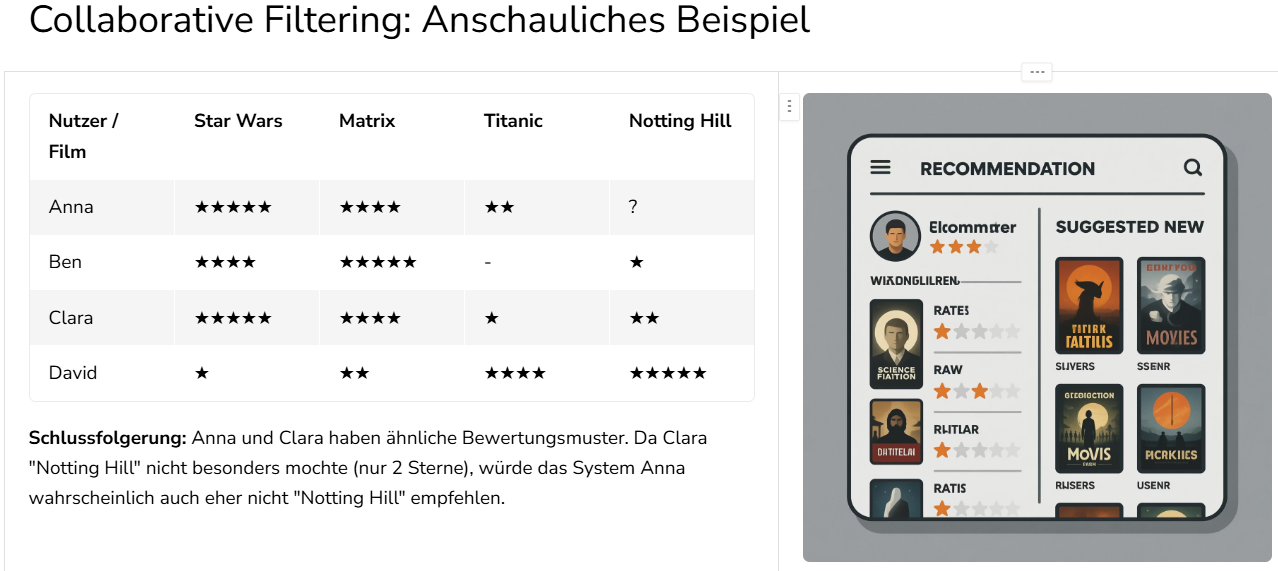

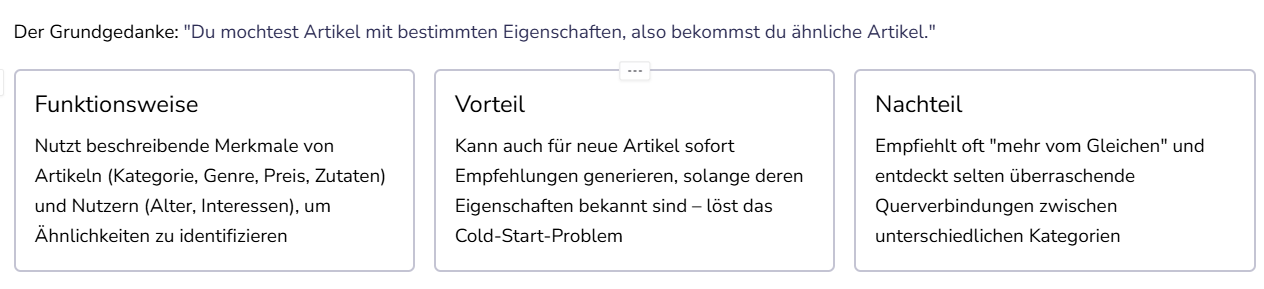

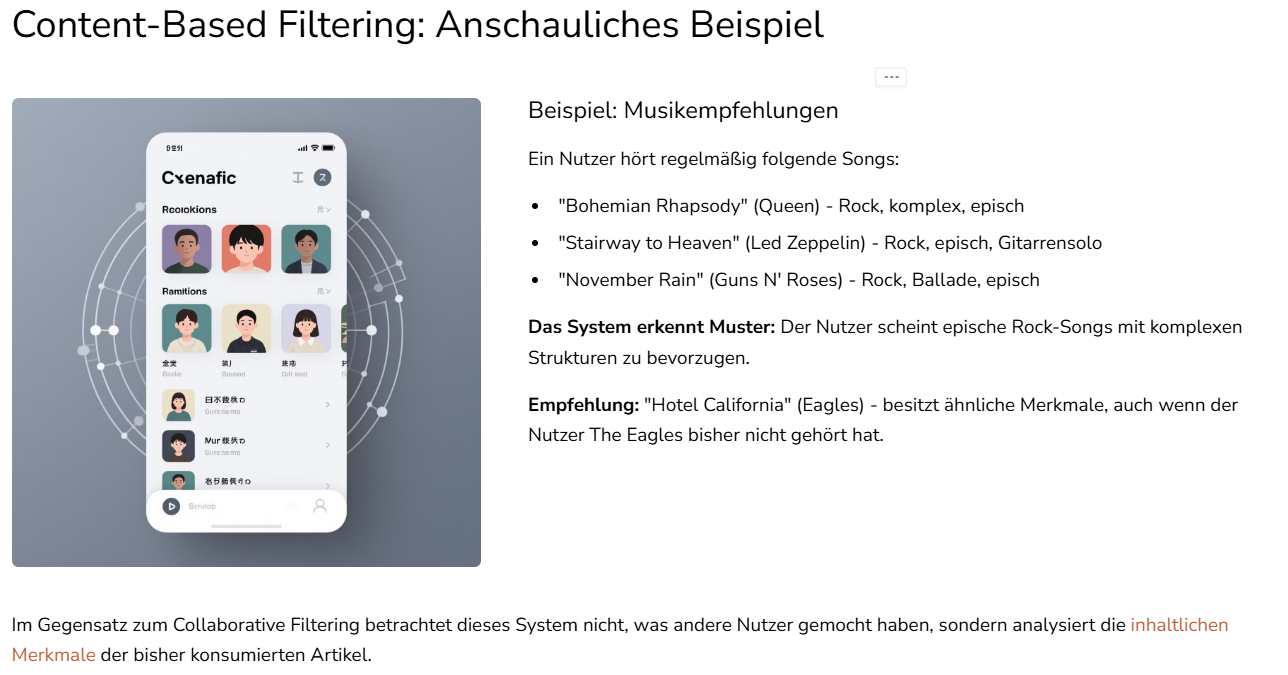

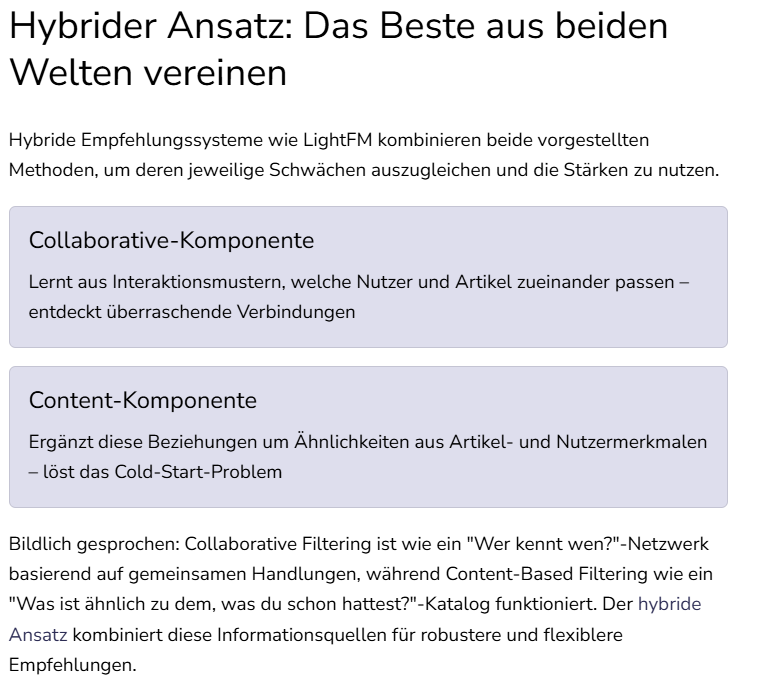

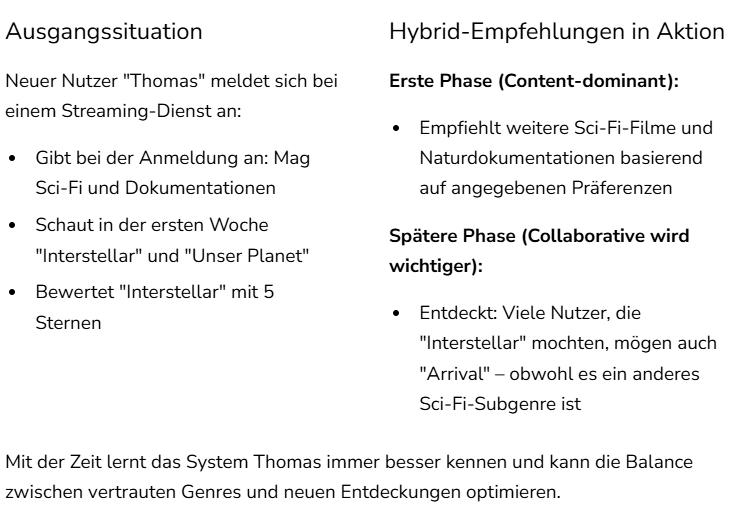

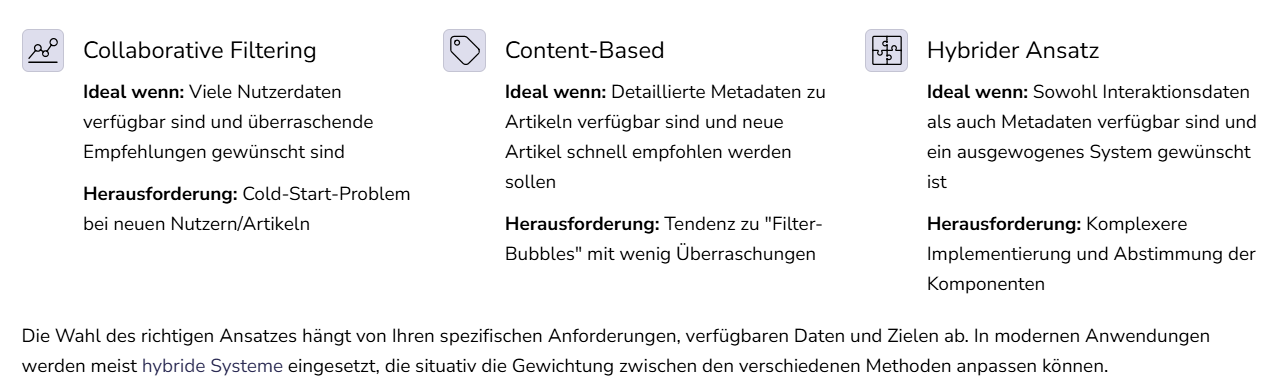



**TensorFlow Recommenders (TFRS)** ist eine Bibliothek von Google, die auf TensorFlow aufbaut und speziell dafür entwickelt wurde, moderne und flexible Empfehlungssysteme zu erstellen. Man kann sie sich als einen hochspezialisierten **Baukasten ** vorstellen, der einem nicht nur ein fertiges Modell gibt, sondern die Werkzeuge, um maßgeschneiderte Empfehlungspipelines zu konstruieren.

Was TFRS im Kern auszeichnet, ist die Konzentration auf den **gesamten Empfehlungsprozess**, der typischerweise aus zwei Phasen besteht:

1.  **Retrieval ( Vorauswahl):** In dieser Phase geht es darum, aus einem riesigen Katalog (z.B. Millionen von Filmen oder Produkten) eine überschaubare Vorauswahl von einigen hundert relevanten Kandidaten für einen bestimmten Nutzer zu treffen. **Ziel: Effizienz und Geschwindigkeit.**
2.  **Ranking (Feinabstimmung):** Das Ranking-Modell nimmt diese kleinere Vorauswahl und sortiert sie präzise, um die Top-Empfehlungen zu ermitteln. Es kann viel mehr Informationen (Features) einbeziehen, um die Wahrscheinlichkeit einer Interaktion (z.B. eines Kaufs oder Klicks) genau vorherzusagen. **Ziel: Präzision.**

TFRS bietet für beide Phasen optimierte Bausteine an.

### Das Kernkonzept: Die "Two-Tower"-Architektur

Die grundlegende Idee hinter den meisten TFRS-Modellen ist die sogenannte **"Two-Tower"-Architektur**. Man kann es sich wie eine Partnervermittlung vorstellen:

* **Der User-Tower (Nutzer-Turm):** Dieser Teil des Modells lernt, ein aussagekräftiges Profil (ein sogenanntes "Embedding") für jeden Nutzer zu erstellen. Er nimmt alle verfügbaren Nutzer-Features (z.B. User-ID, Alter, gesehene Filme) und fasst sie in einem Vektor zusammen, der den Geschmack des Nutzers repräsentiert.

* **Der Item-Tower (Artikel-Turm):** Dieser zweite Turm tut dasselbe für die Artikel. Er nimmt alle Artikel-Features (z.B. Film-ID, Genre, Titel) und erstellt ebenfalls ein Profil in Form eines Vektors.



Das Training des Modells zielt darauf ab, diese beiden Türme so zu optimieren, dass die Vektoren eines Nutzers und die Vektoren der von ihm positiv bewerteten Artikel im Vektorraum möglichst **nahe beieinander** liegen. Wenn das Modell gut trainiert ist, können wir für jeden beliebigen Nutzer den Artikelvektor finden, der seinem Nutzervektor am nächsten ist – das ist dann unsere Empfehlung!

### Was zeichnet TFRS also grundsätzlich aus?

1.  **Flexibilität:** TFRS ist kein starres Modell. Man kann die Türme mit beliebigen neuronalen Netzen und Features gestalten. Ob man Text, Bilder oder kategoriale Daten hat – TFRS bietet die Werkzeuge, um alles in ein leistungsfähiges Hybrid-Modell zu integrieren.
2.  **Produktionsreife & Skalierbarkeit:** Da es auf TensorFlow basiert, sind die mit TFRS gebauten Modelle darauf ausgelegt, mit riesigen Datenmengen umzugehen und effizient in Produktionsumgebungen (z.B. bei Google oder YouTube) eingesetzt zu werden.
3.  **Fokus auf den Gesamtprozess:** TFRS ist eine der wenigen Bibliotheken, die den wichtigen Unterschied zwischen Retrieval und Ranking explizit adressiert und für beide Stufen optimierte Komponenten bereitstellt.



# TensorFlow Recommenders (TFRS)

In [ ]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])

install("tensorflow-recommenders")
install("tensorflow-datasets")

import pprint
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs

print(f"TensorFlow Version: {tf.__version__}")
print(f"TFRS Version: {tfrs.__version__}")

TensorFlow Version: 2.19.0
TFRS Version: v0.7.3


In [1]:
pip install tensorflow-recommenders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 2.7 MB/s eta 0:00:00


In [2]:

import pprint
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_recommenders as tfrs


# Daten laden und vorbereiten

In [3]:
# --- DATEN LADEN UND VORBEREITEN (KLEINERE VERSION) ---

# Wir laden die kleinere "100k"-Version statt der "1m"-Version.
ratings_ds, ratings_info = tfds.load("movielens/100k-ratings", split="train", with_info=True, shuffle_files=True)
movies_ds = tfds.load("movielens/100k-movies", split="train", shuffle_files=True)

# Dieser Teil bleibt unverändert.
ratings = ratings_ds.map(lambda x: {
    "movie_title": x["movie_title"],
    "user_id": x["user_id"],
    "user_rating": x["user_rating"]
})

movies = movies_ds.map(lambda x: x["movie_title"])

print("Erstelle Vokabulare...")
user_ids_vocabulary = tf.keras.layers.StringLookup(mask_token=None)
user_ids_vocabulary.adapt(ratings.map(lambda x: x["user_id"]))

movie_titles_vocabulary = tf.keras.layers.StringLookup(mask_token=None)
movie_titles_vocabulary.adapt(movies)
print("Vokabulare erstellt.")

tf.random.set_seed(42)
shuffled = ratings.shuffle(ratings_info.splits['train'].num_examples, seed=42, reshuffle_each_iteration=False)

train_size = int(0.8 * ratings_info.splits['train'].num_examples)
test_size = int(0.2 * ratings_info.splits['train'].num_examples)

train = shuffled.take(train_size)
test = shuffled.skip(train_size).take(test_size)

cached_train = train.shuffle(100_000).batch(8192).cache()
cached_test = test.batch(4096).cache()

print(f"\nDatensatz erfolgreich verkleinert:")
print(f"Trainingsdaten: {train_size} Beispiele")
print(f"Testdaten: {test_size} Beispiele")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-ratings/incomplete.PY9V1F_0.1.1/movielens-train.tfrecord*..…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-ratings/0.1.1. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-movies/incomplete.RVML7H_0.1.1/movielens-train.tfrecord*...…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-movies/0.1.1. Subsequent calls will reuse this data.
Erstelle Vokabulare...
Vokabulare erstellt.

Datensatz erfolgreich verkleinert:
Trainingsdaten: 80000 Beispiele
Testdaten: 20000 Beispiele


In [4]:
# Nehmen Sie die ersten 3 Einträge aus dem Dataset.
for rating_data in ratings_ds.take(3).as_numpy_iterator():

    # Dekodieren Sie die Byte-Strings in lesbare Texte.
    user_id = rating_data['user_id'].decode('utf-8')
    movie_title = rating_data['movie_title'].decode('utf-8')
    rating = rating_data['user_rating']

    # Geben Sie die gewünschten Informationen für jeden Eintrag aus.
    print(f"User: {user_id} | Film: {movie_title} | Bewertung: {rating}")

User: 138 | Film: One Flew Over the Cuckoo's Nest (1975) | Bewertung: 4.0
User: 92 | Film: Strictly Ballroom (1992) | Bewertung: 2.0
User: 301 | Film: Very Brady Sequel, A (1996) | Bewertung: 4.0


In [5]:
# Nehmen Sie die ersten 3 Einträge aus dem Dataset.
for movie_data in movies_ds.take(3).as_numpy_iterator():

    # Dekodieren Sie die Byte-Strings in lesbare Texte.
    movie_id = movie_data['movie_id'].decode('utf-8')
    movie_title = movie_data['movie_title'].decode('utf-8')

    # Die Genres sind eine Liste von numerischen IDs.
    movie_genres = movie_data['movie_genres']

    # Geben Sie die Informationen für jeden Film aus.
    print(f"ID: {movie_id} | Titel: {movie_title} | Genre-IDs: {movie_genres}")

ID: 1681 | Titel: You So Crazy (1994) | Genre-IDs: [4]
ID: 1457 | Titel: Love Is All There Is (1996) | Genre-IDs: [4 7]
ID: 500 | Titel: Fly Away Home (1996) | Genre-IDs: [1 3]


In [6]:
# ratings_info ist ein tfds.core.DatasetInfo Objekt.
# Wir können es direkt ausgeben, um eine Zusammenfassung zu sehen.
print(ratings_info)

tfds.core.DatasetInfo(
    name='movielens',
    full_name='movielens/100k-ratings/0.1.1',
    description="""
    This dataset contains a set of movie ratings from the MovieLens website, a movie
    recommendation service. This dataset was collected and maintained by [GroupLens]
    (https://grouplens.org/), a research group at the University of Minnesota. There
    are 5 versions included: "25m", "latest-small", "100k", "1m", "20m". In all
    datasets, the movies data and ratings data are joined on "movieId". The 25m
    dataset, latest-small dataset, and 20m dataset contain only movie data and
    rating data. The 1m dataset and 100k dataset contain demographic data in
    addition to movie and rating data.
    
    - "25m": This is the latest stable version of the MovieLens dataset. It is
    recommended for research purposes.
    - "latest-small": This is a small subset of the latest version of the MovieLens
    dataset. It is changed and updated over time by GroupLens.
    - "10

# Modell definieren

In [7]:
class MovieLensModel(tfrs.Model):
    def __init__(self, user_model: tf.keras.Model, movie_model: tf.keras.Model, task: tfrs.tasks.Ranking):
        super().__init__()
        self.user_model = user_model
        self.movie_model = movie_model
        self.task = task

    def compute_loss(self, data, training=False) -> tf.Tensor:
        user_embeddings = self.user_model(data["user_id"])
        movie_embeddings = self.movie_model(data["movie_title"])

        predictions = tf.reduce_sum(user_embeddings * movie_embeddings, axis=1)

        return self.task(
            labels=data["user_rating"],
            predictions=predictions,
        )

embedding_dimension = 32

user_model = tf.keras.Sequential([
    user_ids_vocabulary,
    tf.keras.layers.Embedding(user_ids_vocabulary.vocabulary_size(), embedding_dimension)
])

movie_model = tf.keras.Sequential([
    movie_titles_vocabulary,
    tf.keras.layers.Embedding(movie_titles_vocabulary.vocabulary_size(), embedding_dimension)
])

task = tfrs.tasks.Ranking(
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Modell trainieren und bewerten

In [8]:
model = MovieLensModel(user_model, movie_model, task)
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

print("\n--- MODELLTRAINING STARTET ---\n")
model.fit(cached_train, epochs=3)
print("\n--- MODELLTRAINING ABGESCHLOSSEN ---\n")

print("\n--- MODELLBEWERTUNG AUF TESTDATEN ---\n")
metrics = model.evaluate(cached_test, return_dict=True)
print(f"\nRMSE auf Testdaten: {metrics['root_mean_squared_error']:.4f}")


--- MODELLTRAINING STARTET ---

Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 13.7221 - regularization_loss: 0.0000e+00 - root_mean_squared_error: 3.7065 - total_loss: 13.7221
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.7220 - regularization_loss: 0.0000e+00 - root_mean_squared_error: 3.7065 - total_loss: 13.7220
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.7219 - regularization_loss: 0.0000e+00 - root_mean_squared_error: 3.7065 - total_loss: 13.7219

--- MODELLTRAINING ABGESCHLOSSEN ---


--- MODELLBEWERTUNG AUF TESTDATEN ---

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 13.7425 - regularization_loss: 0.0000e+00 - root_mean_squared_error: 3.7081 - total_loss: 13.7425

RMSE auf Testdaten: 3.7071


# Empfehlungen generieren

In [9]:
# --- 5. EMPFEHLUNGEN GENERIEREN (KORRIGIERTE VERSION) ---

# 1. Erstellen Sie den BruteForce-Index wie zuvor.
index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)

# 2. Erstellen Sie ein Dataset, das numerische Movie IDs und die dazugehörigen Embeddings enthält.
# Wir verwenden das Vokabular, um die String-Titel in Integer-IDs umzuwandeln.
movie_ids_and_embeddings = movies.batch(100).map(
    lambda title: (
        movie_titles_vocabulary(title),  # Konvertiert Titel-String zu Integer-ID
        model.movie_model(title)
    )
)

# 3. Bauen Sie den Index mit den numerischen IDs.
index.index_from_dataset(movie_ids_and_embeddings)


# 4. Holen Sie die Empfehlungen für einen User.
user_id_to_recommend = "12"
print(f"\n--- TOP 10 EMPFEHLUNGEN FÜR USER '{user_id_to_recommend}' ---\n")

# Der Index gibt jetzt numerische IDs zurück.
_, recommended_movie_ids = index(tf.constant([user_id_to_recommend]))


# 5. Konvertieren Sie die numerischen IDs zurück in lesbare Filmtitel.
# Wir holen uns das Vokabular als Liste, um die IDs nachzuschlagen.
movie_vocabulary = movie_titles_vocabulary.get_vocabulary()

# Empfohlene IDs aus dem Tensor extrahieren
recommendations = recommended_movie_ids[0, :10].numpy()

# Die Titel für die Ausgabe nachschlagen und ausgeben
for i, movie_id in enumerate(recommendations):
    title = movie_vocabulary[movie_id]
    print(f"{i+1}. {title}")


--- TOP 10 EMPFEHLUNGEN FÜR USER '12' ---

1. Pretty Woman (1990)
2. Forget Paris (1995)
3. Daytrippers, The (1996)
4. Glory (1989)
5. Raising Arizona (1987)
6. Telling Lies in America (1997)
7. Fierce Creatures (1997)
8. Everyone Says I Love You (1996)
9. Getaway, The (1994)
10. Prophecy, The (1995)


In [10]:
# Die User-ID, für die wir die Historie abrufen wollen.
target_user_id = "12"

# Filtern des ursprünglichen Datensatzes.
# Wichtig: tfds lädt Strings oft als Byte-Strings, daher das b"..."
user_42_ratings = ratings_ds.filter(lambda x: x["user_id"] == tf.constant(target_user_id, dtype=tf.string))

# Um die Ergebnisse zu sortieren, wandeln wir das gefilterte Dataset in eine Python-Liste um.
# Das ist bei einer überschaubaren Anzahl von Bewertungen pro User sehr effizient.
user_42_ratings_list = list(user_42_ratings.as_numpy_iterator())

# Sortieren der Liste nach der Bewertung (user_rating) in absteigender Reihenfolge.
sorted_ratings = sorted(user_42_ratings_list, key=lambda x: x['user_rating'], reverse=True)

print(f"--- Angesehene Filme und Bewertungen für User '{target_user_id}' (höchste zuerst) ---\n")

# Überprüfen, ob der User überhaupt Bewertungen abgegeben hat.
if not sorted_ratings:
    print(f"Für User '{target_user_id}' wurden keine Bewertungen gefunden.")
else:
    # Ausgabe der sortierten Liste.
    for rating_info in sorted_ratings:
        movie_title = rating_info['movie_title'].decode('utf-8')
        user_rating = rating_info['user_rating']
        print(f"Bewertung: {user_rating}/5.0 | Film: {movie_title}")

--- Angesehene Filme und Bewertungen für User '12' (höchste zuerst) ---

Bewertung: 5.0/5.0 | Film: Raising Arizona (1987)
Bewertung: 5.0/5.0 | Film: Primal Fear (1996)
Bewertung: 5.0/5.0 | Film: Get Shorty (1995)
Bewertung: 5.0/5.0 | Film: Kolya (1996)
Bewertung: 5.0/5.0 | Film: Forrest Gump (1994)
Bewertung: 5.0/5.0 | Film: Dead Poets Society (1989)
Bewertung: 5.0/5.0 | Film: Apollo 13 (1995)
Bewertung: 5.0/5.0 | Film: Silence of the Lambs, The (1991)
Bewertung: 5.0/5.0 | Film: Courage Under Fire (1996)
Bewertung: 5.0/5.0 | Film: Burnt By the Sun (1994)
Bewertung: 5.0/5.0 | Film: Sound of Music, The (1965)
Bewertung: 5.0/5.0 | Film: Dances with Wolves (1990)
Bewertung: 5.0/5.0 | Film: Wizard of Oz, The (1939)
Bewertung: 5.0/5.0 | Film: Back to the Future (1985)
Bewertung: 5.0/5.0 | Film: In the Line of Fire (1993)
Bewertung: 5.0/5.0 | Film: When Harry Met Sally... (1989)
Bewertung: 5.0/5.0 | Film: Raiders of the Lost Ark (1981)
Bewertung: 5.0/5.0 | Film: Mr. Holland's Opus (1995)
Bew

In [11]:
# --- MOVIE FEATURES ANZEIGEN ---

# 1. Die Struktur und Features des Datasets ausgeben
# Die Eigenschaft .element_spec ist der beste Weg, um die Struktur zu sehen.
print("--- Struktur des 'movies_ds' Datasets ---\n")
for feature_name, spec in movies_ds.element_spec.items():
    print(f"  - Feature: '{feature_name}'")
    print(f"    - Datentyp: {spec.dtype}")
    print(f"    - Form: {spec.shape}")

# 2. Ein konkretes Beispiel aus dem Dataset anzeigen
print("\n\n--- Beispielhafter Eintrag (erster Film im Dataset) ---\n")

# Wir nehmen den ersten Eintrag (.take(1)) und sehen uns dessen Inhalt an.
for movie_data in movies_ds.take(1).as_numpy_iterator():
    # Die Features aus dem Eintrag extrahieren und lesbar machen
    movie_id = movie_data['movie_id'].decode('utf-8')
    movie_title = movie_data['movie_title'].decode('utf-8')

    # Die Genres sind eine Liste von Integern, die wir nachschlagen müssten,
    # um die Text-Labels zu bekommen (z.B. in der Doku von TFDS).
    # Hier zeigen wir die rohen IDs an.
    movie_genres = movie_data['movie_genres']

    print(f"  - movie_id: {movie_id}")
    print(f"  - movie_title: {movie_title}")
    print(f"  - movie_genres (als IDs): {movie_genres}")

--- Struktur des 'movies_ds' Datasets ---

  - Feature: 'movie_genres'
    - Datentyp: <dtype: 'int64'>
    - Form: (None,)
  - Feature: 'movie_id'
    - Datentyp: <dtype: 'string'>
    - Form: ()
  - Feature: 'movie_title'
    - Datentyp: <dtype: 'string'>
    - Form: ()


--- Beispielhafter Eintrag (erster Film im Dataset) ---

  - movie_id: 1681
  - movie_title: You So Crazy (1994)
  - movie_genres (als IDs): [4]
